In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("./data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots()


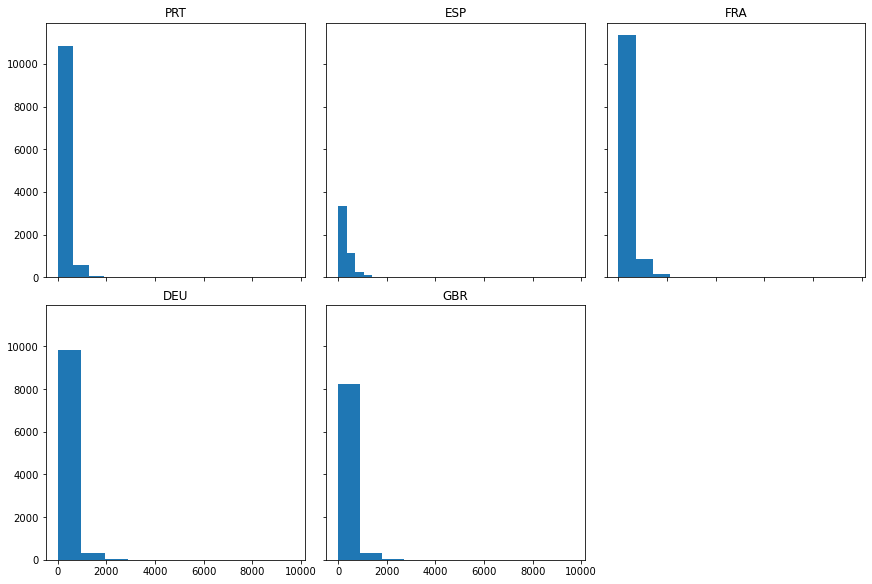

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True, sharex='all', sharey='all')

axes[0][0].hist(hotels.query("Nationality == 'PRT' and RoomNights < 15").loc[:, 'LodgingRevenue'])
axes[0][0].set_title('PRT')

axes[0][1].hist(hotels.query("Nationality == 'ESP' and RoomNights < 15").loc[:, 'LodgingRevenue'])
axes[0][1].set_title('ESP')

axes[0][2].hist(hotels.query("Nationality == 'FRA' and RoomNights < 15").loc[:, 'LodgingRevenue'])
axes[0][2].set_title('FRA')

axes[1][0].hist(hotels.query("Nationality == 'DEU' and RoomNights < 15").loc[:, 'LodgingRevenue'])
axes[1][0].set_title('DEU')

axes[1][1].hist(hotels.query("Nationality == 'GBR' and RoomNights < 15").loc[:, 'LodgingRevenue'])
axes[1][1].set_title('GBR')

axes[1][2].set_axis_off()

plt.show()

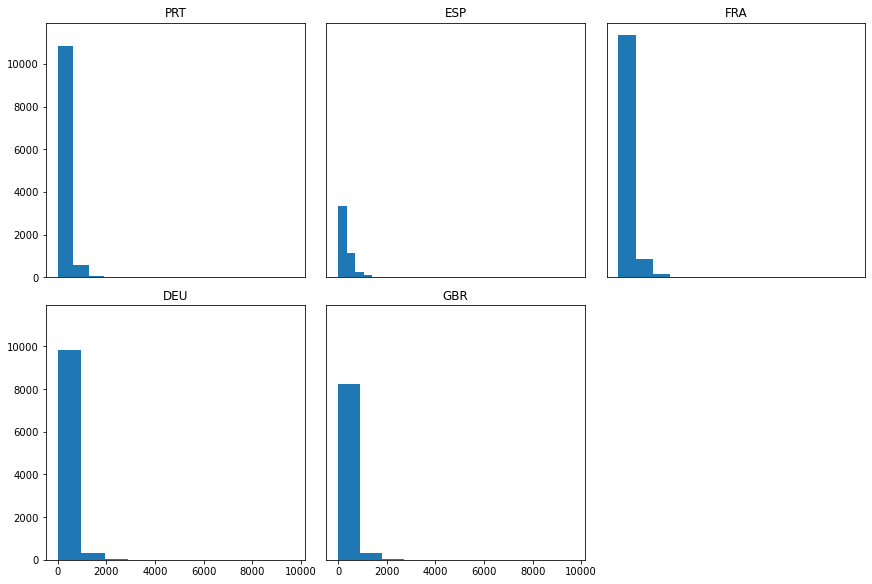

In [4]:
top_nations = ["PRT", "ESP", "FRA", "DEU", "GBR"]

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
nrows, ncols = (2, 3)
ax_list = []

for i in range(len(top_nations)):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(hotels.query(f"Nationality == '{top_nations[i]}' and RoomNights < 15").loc[:, 'LodgingRevenue'])
    ax.set_title(top_nations[i])
    ax_list.append(ax)
    if i // ncols < (nrows - 1):
        ax.set_xticks([])
    if i % ncols > 0:
        ax.set_yticks([])

ax_list[0].get_shared_x_axes().join(*ax_list)
ax_list[0].get_shared_y_axes().join(*ax_list)
plt.show()

# Assignment 2: GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [21]:
hotels = hotels.assign(
    date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
)

# Prep Data For Line Chart

montly_revenue = hotels.groupby('date').agg({
    'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'
}).resample('M').sum()

montly_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


In [11]:
# Prep Data For Bar Chart
bar_data = hotels.groupby('Nationality').agg({'total_revenue': 'sum'}).sort_values('total_revenue', ascending=False).iloc[:5]
bar_data

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


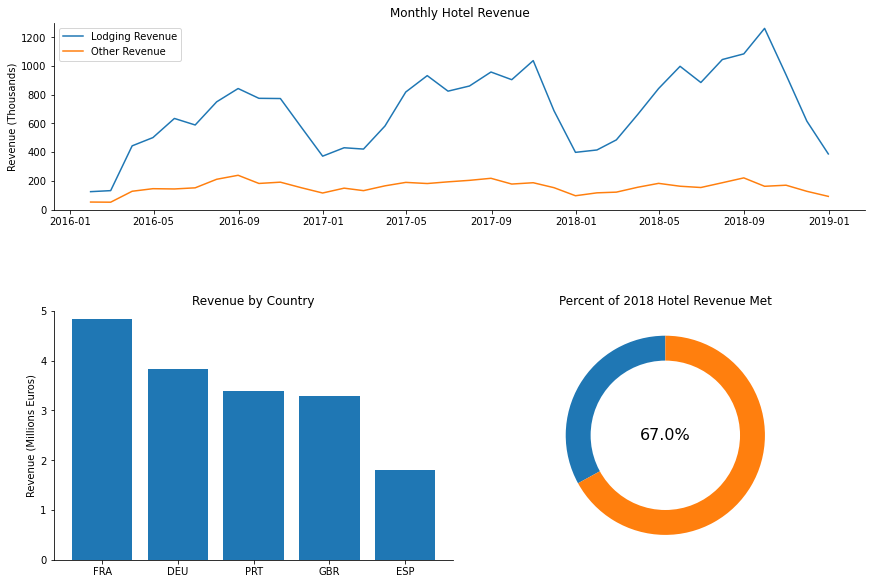

In [47]:
# Build GridSpec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
grid = GridSpec(8, 8, figure=fig)

ax_line = fig.add_subplot(grid[:3, :])
ax_bar = fig.add_subplot(grid[4:, :4])
ax_pie = fig.add_subplot(grid[4:, 4:])

ax_line.plot(montly_revenue.index,
            montly_revenue['LodgingRevenue']/1000, label='Lodging Revenue')
ax_line.plot(montly_revenue.index,
            montly_revenue['OtherRevenue']/1000, label='Other Revenue')
ax_line.set_ylim(0, 1300)
ax_line.set_ylabel('Revenue (Thousands)')
ax_line.legend()
ax_line.set_title('Monthly Hotel Revenue')
ax_line.spines['top'].set_visible(False)
ax_line.spines['right'].set_visible(False)


ax_bar.bar(bar_data.index, bar_data['total_revenue'] / 1000000)
ax_bar.set_ylim(0, 5)
ax_bar.set_ylabel('Revenue (Millions Euros)')
ax_bar.set_title('Revenue by Country')
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)

progress_data = [0.33, 0.67]

ax_pie.pie(progress_data,
          startangle=90,
          labels=['',''],
          pctdistance=0.85)

hole = plt.Circle((0, 0), 0.75, fc='white')
# plt.gcf().gca().add_artist(hole)
ax_pie.add_artist(hole)
ax_pie.text(0, 0, f'{progress_data[1] * 100}%',
            ha='center', va='center',
           fontsize=16)

ax_pie.set_title('Percent of 2018 Hotel Revenue Met')

plt.show()


# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

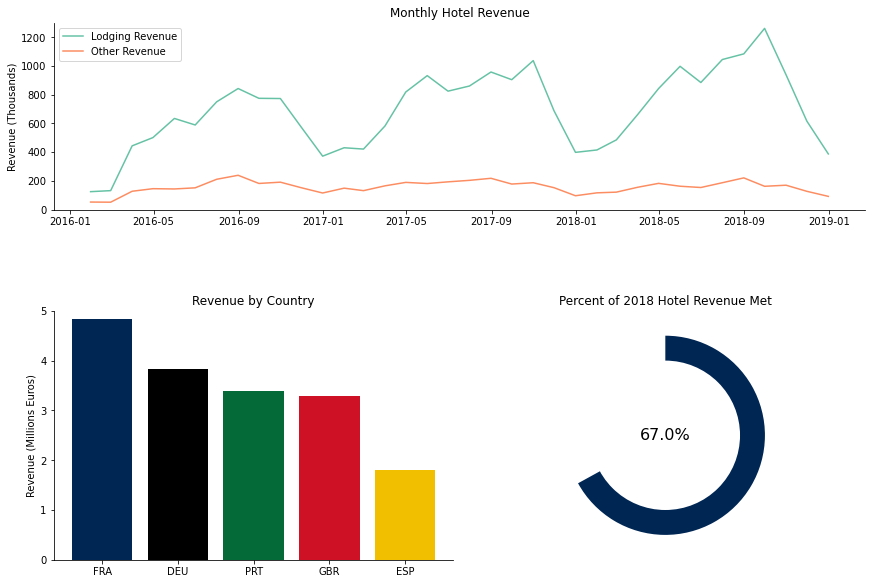

In [57]:
# Build GridSpec
from matplotlib.gridspec import GridSpec

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
grid = GridSpec(8, 8, figure=fig)

ax_line = fig.add_subplot(grid[:3, :])
ax_bar = fig.add_subplot(grid[4:, :4])
ax_pie = fig.add_subplot(grid[4:, 4:])

ax_line.plot(montly_revenue.index,
            montly_revenue['LodgingRevenue']/1000, label='Lodging Revenue')
ax_line.plot(montly_revenue.index,
            montly_revenue['OtherRevenue']/1000, label='Other Revenue')
ax_line.set_ylim(0, 1300)
ax_line.set_ylabel('Revenue (Thousands)')
ax_line.legend()
ax_line.set_title('Monthly Hotel Revenue')
ax_line.spines['top'].set_visible(False)
ax_line.spines['right'].set_visible(False)


country_colors=['#002654', '#000000', '#046A38', '#CE1124', '#F1BF00']
ax_bar.bar(bar_data.index, bar_data['total_revenue'] / 1000000,
          color=country_colors)
ax_bar.set_ylim(0, 5)
ax_bar.set_ylabel('Revenue (Millions Euros)')
ax_bar.set_title('Revenue by Country')
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)

progress_data = [0.33, 0.67]

ax_pie.pie(progress_data,
          startangle=90,
          labels=['',''],
           colors=['white', '#002654'],
          pctdistance=0.85)

hole = plt.Circle((0, 0), 0.75, fc='white')
# plt.gcf().gca().add_artist(hole)
ax_pie.add_artist(hole)
ax_pie.text(0, 0, f'{progress_data[1] * 100}%',
            ha='center', va='center',
           fontsize=16)

ax_pie.set_title('Percent of 2018 Hotel Revenue Met')

plt.show()


# Assignment 4: Stylesheets
* Apply a stylesheet to the above code

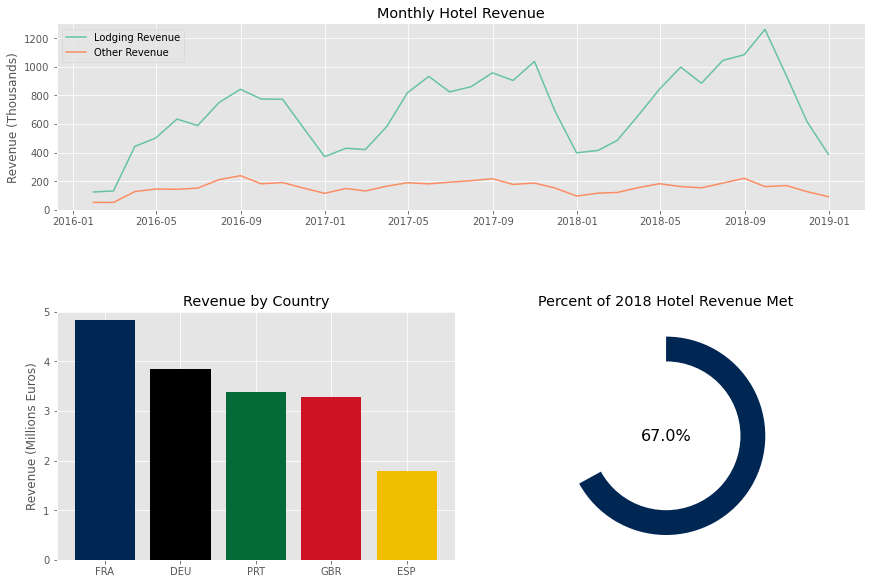

In [58]:
plt.style.use('ggplot')

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
grid = GridSpec(8, 8, figure=fig)

ax_line = fig.add_subplot(grid[:3, :])
ax_bar = fig.add_subplot(grid[4:, :4])
ax_pie = fig.add_subplot(grid[4:, 4:])

ax_line.plot(montly_revenue.index,
            montly_revenue['LodgingRevenue']/1000, label='Lodging Revenue')
ax_line.plot(montly_revenue.index,
            montly_revenue['OtherRevenue']/1000, label='Other Revenue')
ax_line.set_ylim(0, 1300)
ax_line.set_ylabel('Revenue (Thousands)')
ax_line.legend()
ax_line.set_title('Monthly Hotel Revenue')
ax_line.spines['top'].set_visible(False)
ax_line.spines['right'].set_visible(False)


country_colors=['#002654', '#000000', '#046A38', '#CE1124', '#F1BF00']
ax_bar.bar(bar_data.index, bar_data['total_revenue'] / 1000000,
          color=country_colors)
ax_bar.set_ylim(0, 5)
ax_bar.set_ylabel('Revenue (Millions Euros)')
ax_bar.set_title('Revenue by Country')
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)

progress_data = [0.33, 0.67]

ax_pie.pie(progress_data,
          startangle=90,
          labels=['',''],
           colors=['white', '#002654'],
          pctdistance=0.85)

hole = plt.Circle((0, 0), 0.75, fc='white')
# plt.gcf().gca().add_artist(hole)
ax_pie.add_artist(hole)
ax_pie.text(0, 0, f'{progress_data[1] * 100}%',
            ha='center', va='center',
           fontsize=16)

ax_pie.set_title('Percent of 2018 Hotel Revenue Met')

plt.show()
